<a href="https://colab.research.google.com/github/karthikasai1828/PRODIGY_ML_02/blob/main/Mall_customer_segmentation_with_Kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Clustering involves identifying similarities within unlabeled datasets and subsequently partitioning them into distinct clusters. These clusters lack predefined labels and necessitate recognition based on domain knowledge acquired from the dataset's real-world context post-clustering. If confident about the identified labels, the problem can transition to supervised learning for new data points, leveraging the insights gained.

**K-Means Clustering:**

The fundamental concept of K-Means Clustering is straightforward. Each data point is assigned to a cluster, with exclusivity ensuring each point belongs to only one cluster.

**Steps of K-Means:**

**Choosing K (Number of Clusters):**
1. Select an initial value for K (usually K=2).
2. Measure the Sum of Square Distances (SSD).
3. Fit a new Kmeans model with K+1 and measure SSD again.
4. Repeat this process, tracking SSD across various K values until observing diminishing returns, indicating that adding extra clusters doesn't significantly enhance cluster separation (Elbow method).

**K-Means Procedure:**

1. Randomly select K distinct data points as cluster centroids.
2. Assign each remaining point to the nearest cluster centroid.
3. Compute the mean value of each point vector to determine the center of each cluster.
4. Reassign each point to the nearest cluster center.
5. Iterate steps 3 and 4 until no further reassignments occur.

**Choosing K Value:**

Evaluation of goodness of fit involves tracking the reduction in SSD for different K values.
Theoretically, as K increases (up to the number of data points), SSD tends towards zero.
In practice, observe the rate of decline in SSD across various K values to discern the optimal number of clusters, avoiding excessive additions that don't significantly improve cluster clarity.

In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [22]:
df= pd.read_csv("/content/drive/MyDrive/prodigy_data set/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Data Overview:**

This project focuses on Mall Customer Segmentation, also referred to as market basket analysis, utilizing unsupervised machine learning techniques, specifically the KMeans Clustering Algorithm, Gradient Boost Classifier Algorithm, and Naive Bayes Classifier Algorithm, in its simplest form.

**Content:**

The dataset contains essential customer information gathered through membership cards at a supermarket mall. Attributes include Customer ID, age, gender, annual income, and spending score. The spending score is assigned based on predefined parameters, such as customer behavior and purchasing data.

**Problem Statement:**

As the owner of the mall, the objective is to comprehend customer segments, particularly those easily targeted [Target Customers], enabling informed marketing strategies tailored to the identified segments.

**Inspiration:**

**Through this case study, the following questions will be addressed:**

How to perform customer segmentation utilizing machine learning algorithms, specifically KMeans Clustering, in Python, employing a straightforward approach.
Identification of target customers to initiate marketing strategies effectively, focusing on ease of engagement.
Real-world implications of marketing strategies and their efficacy.
By addressing these aspects, a comprehensive understanding of customer segmentation and its practical applications in marketing strategies will be attained.









In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [28]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# **Data Cleaning**

In [31]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Here, There is no missing value

creating Dummy Variables

In [32]:
df.select_dtypes(include='object')

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female
...,...
195,Female
196,Female
197,Male
198,Male


In [33]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')

In [34]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [35]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  200 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [36]:
# Converting objects to number by one-hot encoding(drop_first=True:removes multi-collinearity)
df_obj= pd.get_dummies(df_obj, drop_first=True)

In [37]:
Final_df= pd.concat([df_num, df_obj], axis=1)
Final_df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False


In [38]:
Final_df= Final_df.drop('CustomerID', axis=1)
Final_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False
...,...,...,...,...
195,35,120,79,False
196,45,126,28,False
197,32,126,74,True
198,32,137,18,True


# **Exploratory Data Analysis**
EDA is very important in Unsupervised learning because it helps to have more domain knowledge.

<Axes: xlabel='Age', ylabel='Count'>

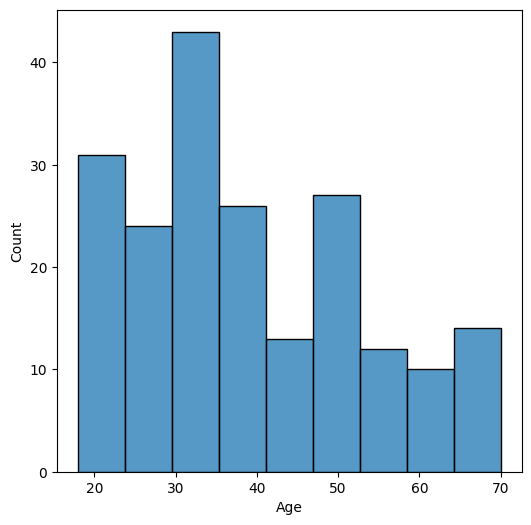

In [39]:
plt.figure(figsize=(6,6))
sns.histplot(data=Final_df, x='Age')

**The age group ranging from 30 to 35 exhibits the highest shopping activity at this mall.**

<Axes: xlabel='Gender_Male', ylabel='count'>

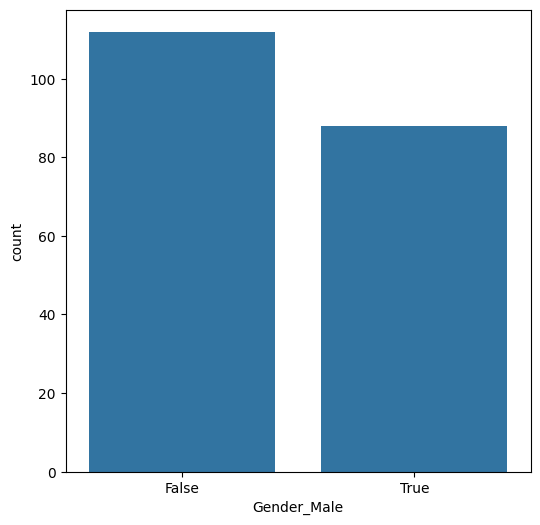

In [40]:
plt.figure(figsize=(6,6))
sns.countplot(x='Gender_Male', data=Final_df)

**After encoding dummy variables, where 0 represents female and 1 represents male, it indicates that females have exhibited higher shopping activity within this mall.**

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

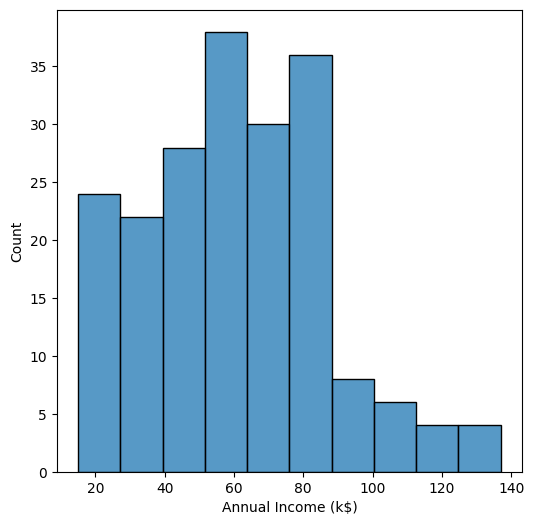

In [41]:
plt.figure(figsize=(6, 6))
sns.histplot(data=Final_df, x='Annual Income (k$)')

**The majority of customers exhibit an annual income below $80,000.**

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

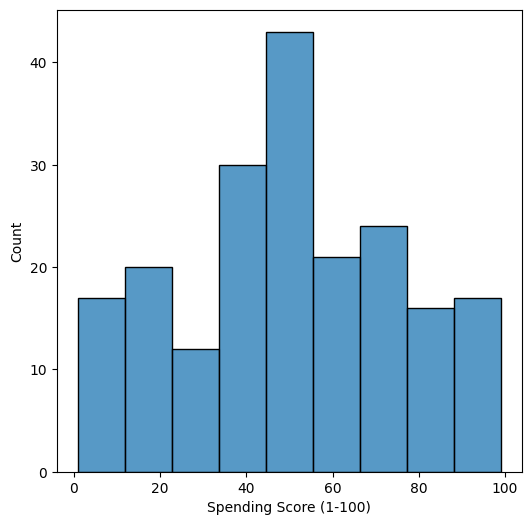

In [42]:
plt.figure(figsize=(6, 6))
sns.histplot(data=Final_df, x='Spending Score (1-100)')

**The majority of customers exhibit a spending score hovering around 50.**

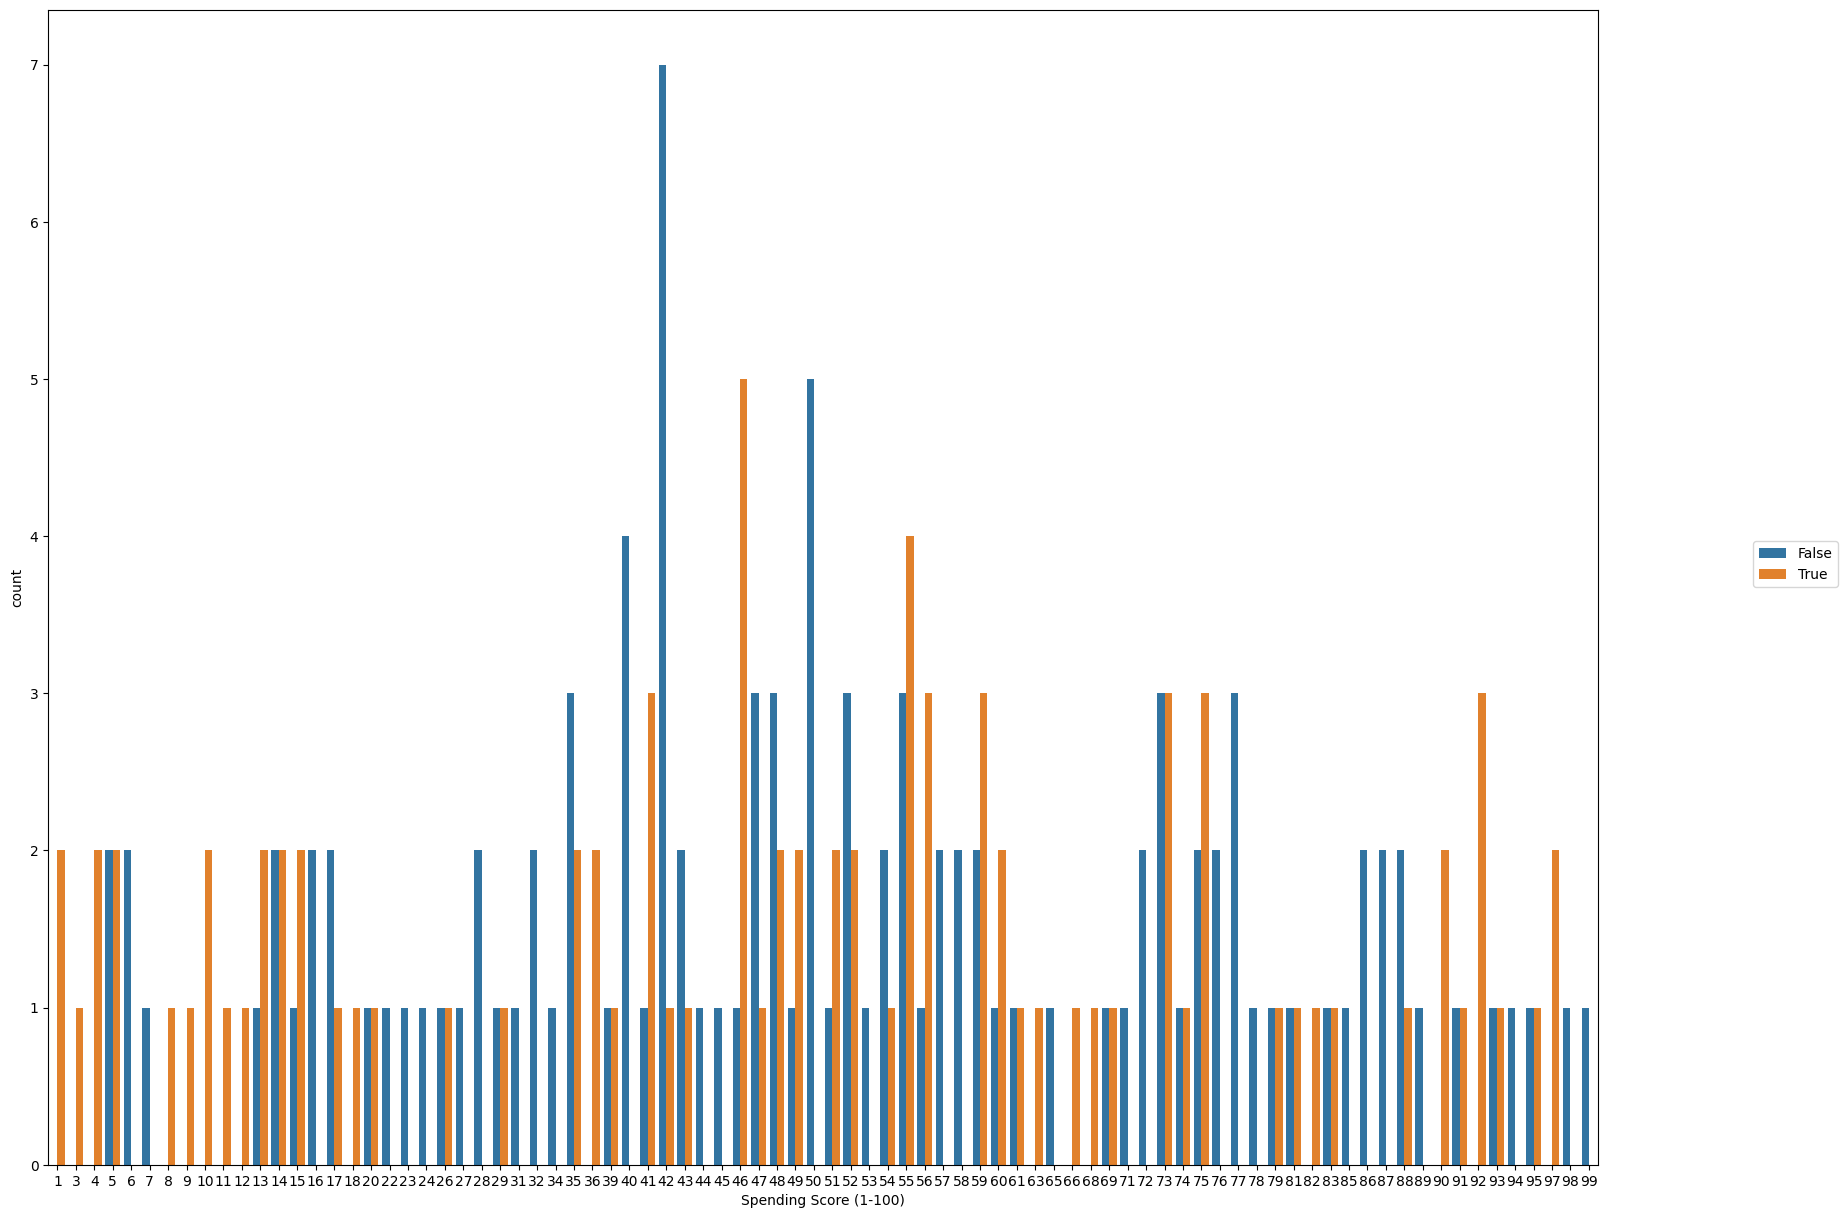

In [43]:
plt.figure(figsize=(20, 15))
sns.countplot(data=Final_df, x='Spending Score (1-100)', hue='Gender_Male' )
plt.legend(loc=(1.1, 0.5))

**Women in their 40s exhibit a keen interest in shopping.**


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

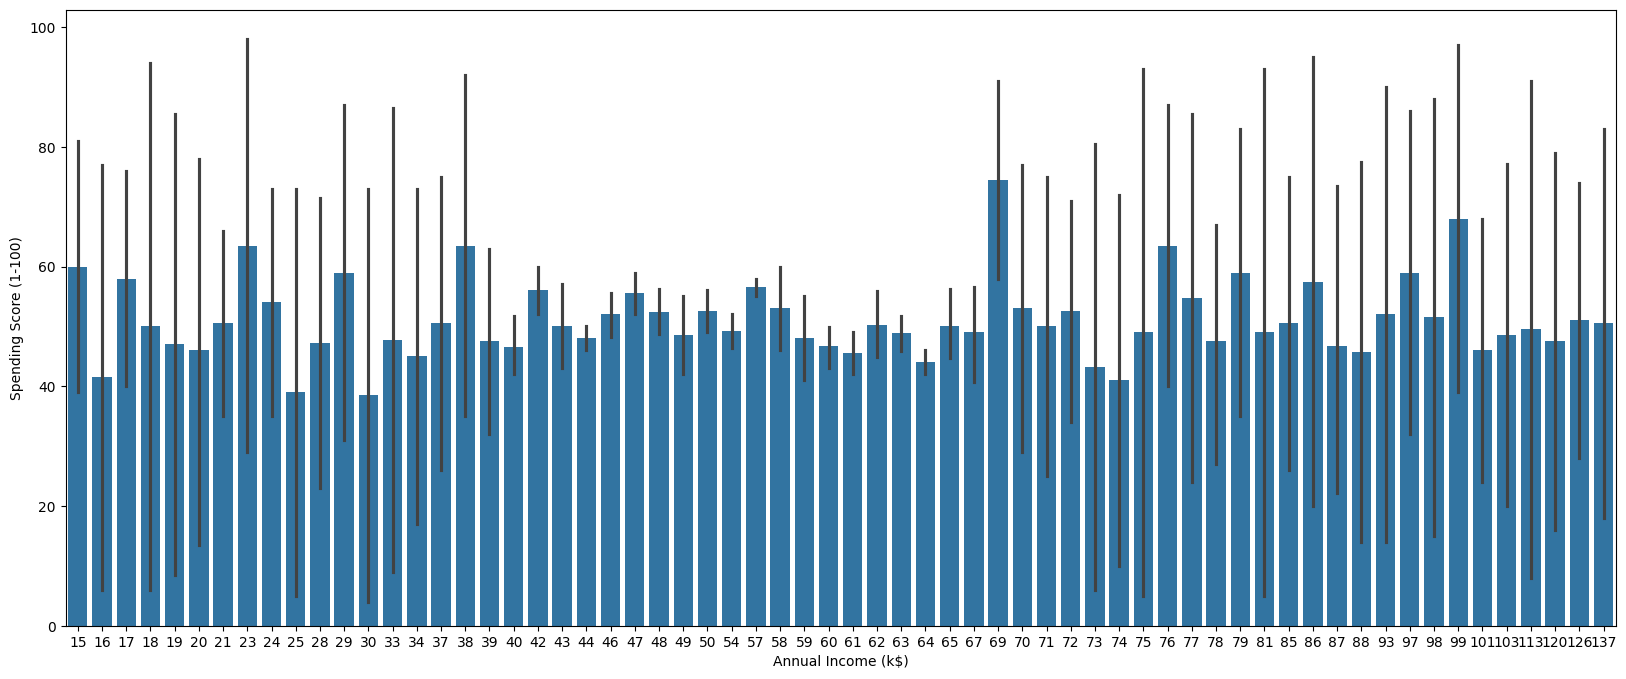

In [44]:
plt.figure(figsize=(20,8))
sns.barplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=Final_df)

**The relationship between Annual Income and Spending Score is evident. Surprisingly, individuals with the highest income tend to spend the same amount or even less compared to those with average incomes.**

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

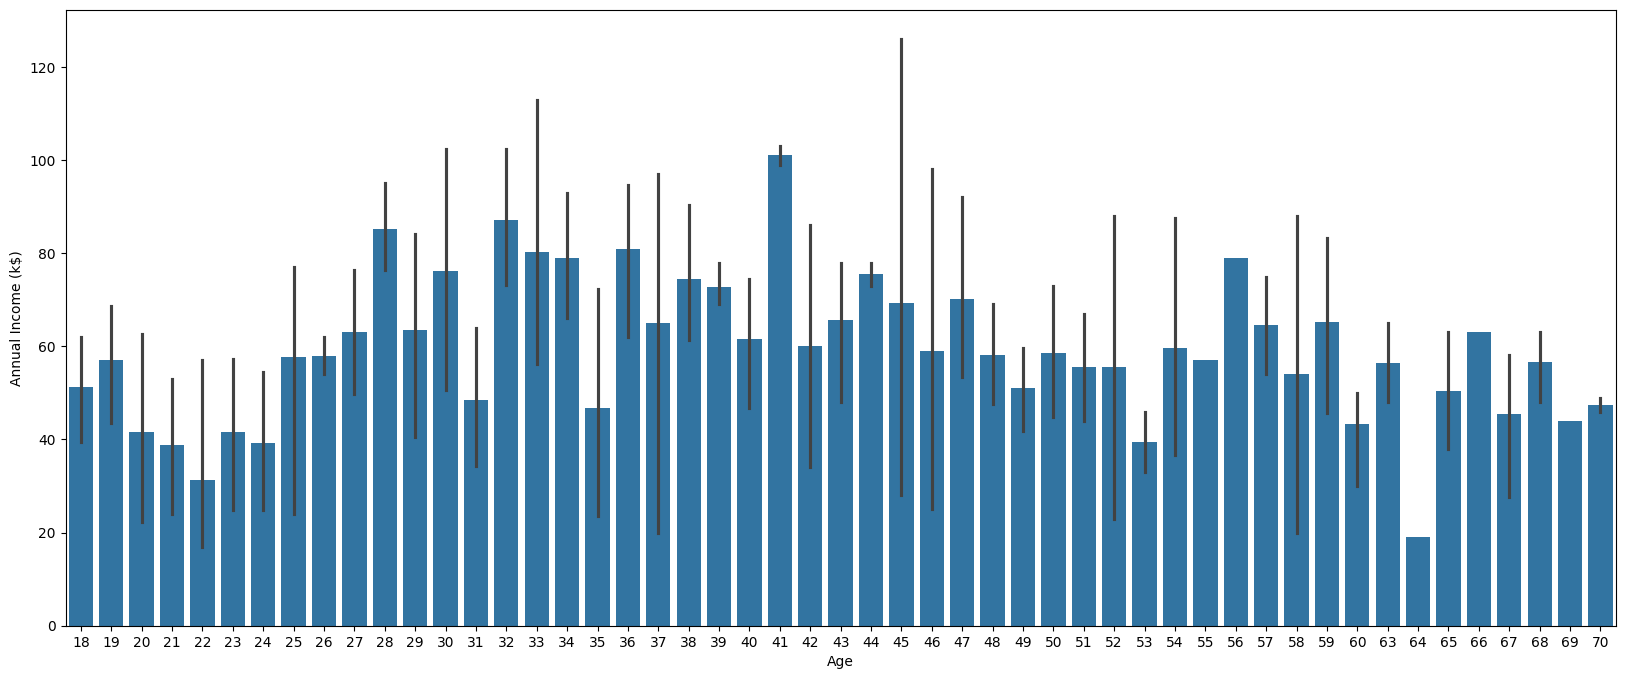

In [45]:
plt.figure(figsize=(20,8))
sns.barplot(x='Age',y='Annual Income (k$)',data=Final_df)

**The age group of 40-year-olds exhibits the highest median annual income.**

# **Scaling the features**

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X= scaler.fit_transform(Final_df)
scaled_X

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.06573534, -1.54815205,  1.04041783, -0.88640526],
       [-0.13276838, -1.54815205, -1.44416206,  1.12815215],
       [-1.20926872, -1.54815205,  1.11806095,  1.12815215],
       [-0.27630176, -1.

# **K Means Clustering Algorithm**

In [47]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
cluster_labels= model.fit_predict(scaled_X)
cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 0,
       1, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 2, 0, 1, 2, 2, 2, 1, 0, 2, 1, 0,
       1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 1, 2, 0, 2, 1, 1, 2, 2, 2,
       2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0,
       1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0], dtype=int32)

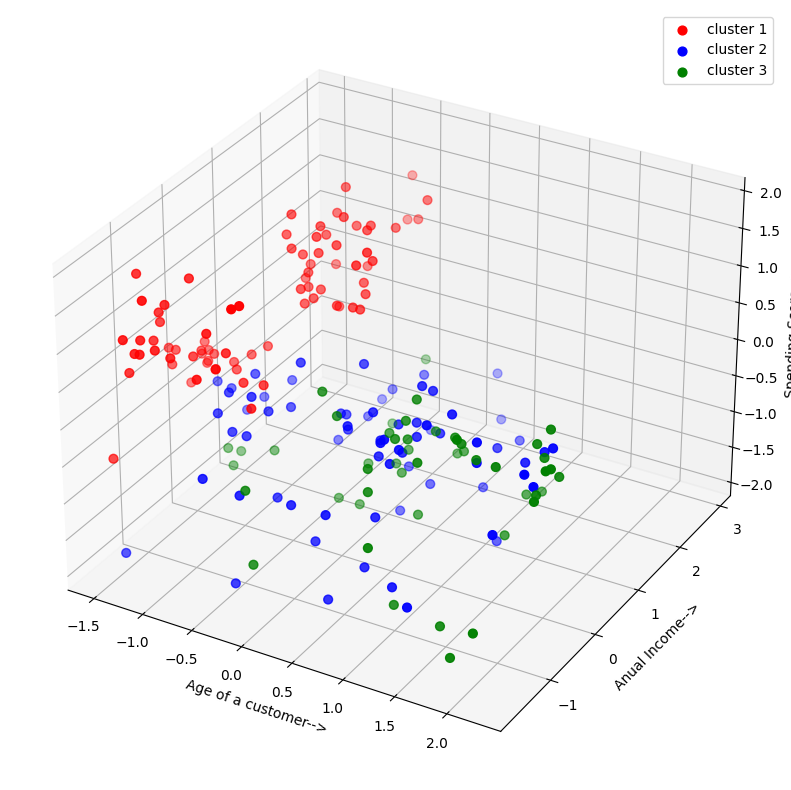

In [48]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_X[cluster_labels == 0,0],scaled_X[cluster_labels == 0,1],scaled_X[cluster_labels == 0,2],s = 40 , color = 'red', label = "cluster 1")
ax.scatter(scaled_X[ cluster_labels== 1,0],scaled_X[ cluster_labels== 1,1],scaled_X[ cluster_labels== 1,2],s = 40 , color = 'blue', label = "cluster 2")
ax.scatter(scaled_X[ cluster_labels== 2,0],scaled_X[ cluster_labels== 2,1],scaled_X[ cluster_labels== 2,2], s = 40 , color = 'green', label = "cluster 3")
ax.set_xlabel('Age of a customer-->')
ax.set_ylabel('Anual Income-->')
ax.set_zlabel('Spending Score-->')
ax.legend()
plt.show()

## **Choosing K values**

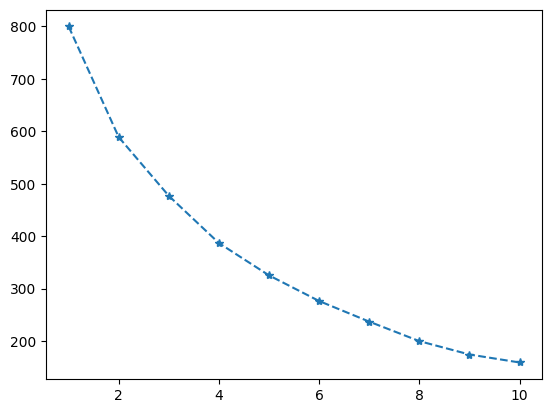

In [49]:
wcss=[]
from sklearn.cluster import KMeans
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init="k-means++", n_init = 10, max_iter=300)
  kmeans.fit(scaled_X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss,'*--')

**It seems k=5 is a good choice because we see a significantly drop in the curve**

In [50]:
new_model = KMeans(n_clusters=5)
y_pred1= new_model.fit_predict(scaled_X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [51]:
print("shape of y_pred1 is:", y_pred1.shape)
y_pred1

shape of y_pred1 is: (200,)


array([0, 0, 1, 3, 1, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 0, 1, 0, 2, 3, 2, 0,
       1, 0, 1, 0, 1, 0, 1, 3, 2, 3, 2, 0, 1, 3, 1, 3, 1, 3, 1, 0, 2, 3,
       1, 3, 1, 3, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 3, 2, 2, 0, 1, 1, 2, 0,
       1, 1, 0, 3, 2, 1, 1, 1, 2, 0, 1, 2, 3, 1, 2, 0, 2, 1, 3, 2, 1, 3,
       3, 1, 1, 0, 2, 1, 3, 0, 1, 3, 2, 0, 3, 1, 2, 0, 2, 3, 1, 2, 2, 2,
       2, 3, 1, 0, 3, 3, 1, 1, 1, 1, 0, 1, 3, 0, 3, 3, 2, 0, 2, 0, 2, 0,
       3, 3, 4, 3, 4, 0, 4, 3, 4, 0, 3, 3, 4, 0, 2, 3, 4, 0, 4, 0, 4, 3,
       4, 3, 4, 3, 4, 3, 1, 3, 4, 3, 2, 3, 4, 3, 4, 0, 4, 0, 4, 0, 4, 3,
       2, 0, 2, 0, 4, 3, 4, 3, 4, 0, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0], dtype=int32)

In [52]:
Final_df['Cluster']=y_pred1
Final_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Cluster
0,19,15,39,True,0
1,21,15,81,True,0
2,20,16,6,False,1
3,23,16,77,False,3
4,31,17,40,False,1
...,...,...,...,...,...
195,35,120,79,False,3
196,45,126,28,False,4
197,32,126,74,True,0
198,32,137,18,True,4


In [53]:
X = Final_df.iloc[:,[1,2,3]].values
y= new_model.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [54]:
X[:5]

array([[15, 39, True],
       [15, 81, True],
       [16, 6, False],
       [16, 77, False],
       [17, 40, False]], dtype=object)

In [55]:
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

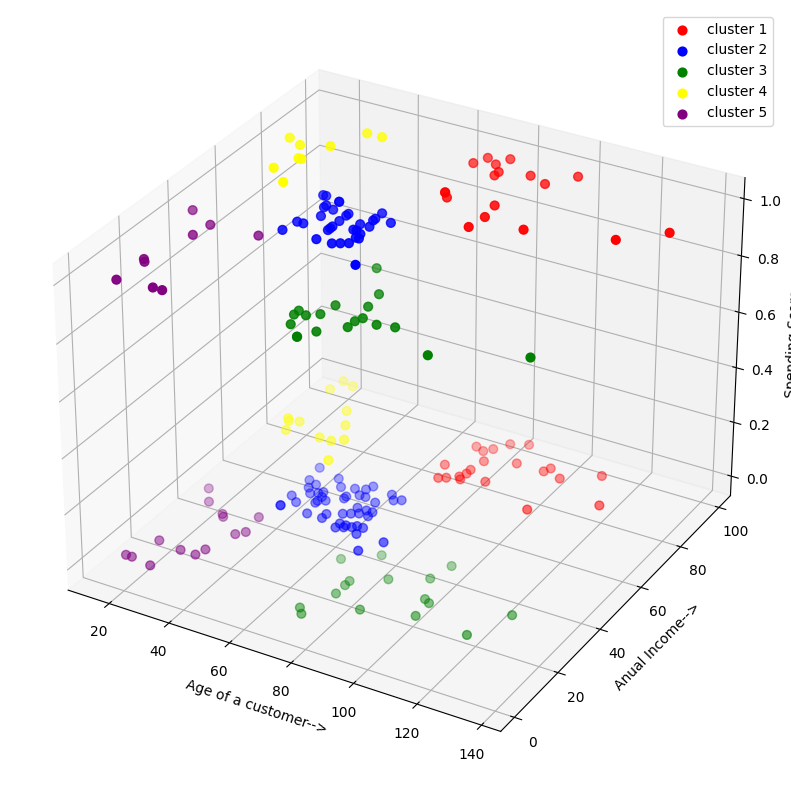

In [56]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y == 0,0],X[y == 0,1],X[y == 0,2], s = 40 , color = 'red', label = "cluster 1")
ax.scatter(X[y == 1,0],X[y == 1,1],X[y == 1,2], s = 40 , color = 'blue', label = "cluster 2")
ax.scatter(X[y == 2,0],X[y == 2,1],X[y == 2,2], s = 40 , color = 'green', label = "cluster 3")
ax.scatter(X[y == 3,0],X[y == 3,1],X[y == 3,2], s = 40 , color = 'yellow', label = "cluster 4")
ax.scatter(X[y == 4,0],X[y == 4,1],X[y == 4,2], s = 40 , color = 'purple', label = "cluster 5")
ax.set_xlabel('Age of a customer-->')
ax.set_ylabel('Anual Income-->')
ax.set_zlabel('Spending Score-->')
ax.legend()
plt.show()


Upon analysis, selecting K=5 appears optimal for clustering.

Cluster 2 comprises individuals under 40 years with notably high annual incomes, correlating with their elevated spending scores. Consequently, incentivizing this demographic with enhanced offers is prudent to sustain their engagement.

Both Cluster 2 and Cluster 4 represent prime candidates for targeted promotional offers, aimed at fostering their patronage at the mall.

In [57]:
Final_df["Target"]= y

In [58]:
clustered_df = Final_df
clustered_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Cluster,Target
0,19,15,39,True,0,4
1,21,15,81,True,0,3
2,20,16,6,False,1,4
3,23,16,77,False,3,3
4,31,17,40,False,1,4
...,...,...,...,...,...,...
195,35,120,79,False,3,0
196,45,126,28,False,4,2
197,32,126,74,True,0,0
198,32,137,18,True,4,2


In [59]:
X = clustered_df.iloc[:,0:4]
Y = clustered_df.iloc[:,-1]
X.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In the initial line, "X = Clustered_df.iloc[:, 0:4]," a targeted extraction operation is performed on the DataFrame Clustered_df. This operation encompasses all rows and columns indexed from 0 to 4 (exclusive), aiming to encapsulate the pertinent features essential for subsequent employment within your clustering algorithm.

Subsequently, the following line, "y = Clustered_df.iloc[:, -1]," executes a refined data extraction from Clustered_df. It comprehensively captures all rows and specifically targets the last column (-1), thereby effectively isolating the pertinent labels or target variables crucial for the data analysis process.

# **Neive Bayes Classifier**

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
X_train.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
190,34,103,23,False
7,23,18,94,False
26,45,28,32,False
138,19,74,10,True
58,27,46,51,False


In [62]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [63]:
from sklearn.naive_bayes import GaussianNB
NB_Model = GaussianNB()
NB_Model.fit(X_train, y_train)
y_pred1 = NB_Model.predict(X_test)


In [64]:
prediction = pd.DataFrame({'Original Value': y_test, 'Predicted Value': y_pred1})

# Print the DataFrame
display(prediction)

,Original Value,Predicted Value
59,1,1
5,3,3
20,4,4
198,2,2
52,1,1
19,3,3
162,2,2
55,1,1
69,1,1
2,4,4


In [65]:
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score,)

accuray = accuracy_score(y_pred1, y_test)
f1 = f1_score(y_pred1, y_test, average="weighted")

print("NB_Model_Accuracy is:", accuray)
print("NB_Model_F1 Score is:", f1)

NB_Model_Accuracy is: 1.0
NB_Model_F1 Score is: 1.0


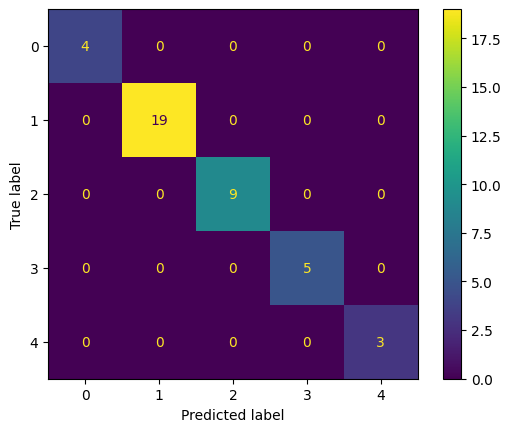

In [66]:
labels = [0,1,2,3,4]
cm = confusion_matrix(y_test, y_pred1, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

# **Gradient Boosting Classifier**

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [68]:
gbc_Model = GradientBoostingClassifier(n_estimators=50,random_state=5)

In [69]:
gbc_Model.fit(X_train,y_train)
y_pred2=gbc_Model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print("gbc_Model_accuracy is:", accuracy)

gbc_Model_accuracy is: 0.95


In [70]:
y_pred2=gbc_Model.predict(X_test)
y_pred2

array([1, 3, 4, 2, 1, 3, 2, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2,
       1, 1, 1, 1, 2, 3, 1, 2, 0, 3, 1, 1, 3, 2, 0, 1, 1, 2], dtype=int32)

In [71]:
prediction2 = pd.DataFrame({'Original Value': y_test, 'Predicted Value': y_pred2})

# Print the DataFrame
display(prediction2)

,Original Value,Predicted Value
59,1,1
5,3,3
20,4,4
198,2,2
52,1,1
19,3,3
162,2,2
55,1,1
69,1,1
2,4,4
